In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\Dataset .csv")

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn dtypes:")
print(df.dtypes)

Dataset shape: (9551, 21)

First 5 rows:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La

In [5]:
print("Actual columns in your dataset:")
print(df.columns.tolist())

Actual columns in your dataset:
['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [6]:
print("\nStep 2: Preprocessing data...")
print("\nMissing values per column:")
print(df.isnull().sum())
df = df.assign(
    Cuisines=df['Cuisines'].fillna('Unknown'),
    City=df['City'].fillna('Unknown')
)
if 'Has Table booking' in df.columns:
    df.loc[:, 'Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0}).fillna(0)
    
print("\nAfter preprocessing:")
print("Sample Cuisines:", df['Cuisines'].unique()[:5])
if 'Has Table booking' in df.columns:
    print("Table booking values:", df['Has Table booking'].unique())


Step 2: Preprocessing data...

Missing values per column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

After preprocessing:
Sample Cuisines: ['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' 'Japanese, Sushi' 'Japanese, Korean']
Table booking values: [1 0]


In [7]:
print("\nStep 3: Feature engineering...")
TARGET = 'Aggregate rating'

if TARGET not in df.columns:
    available_columns = list(df.columns)
    print(f"Available columns: {available_columns}")
    raise KeyError(f"Neither 'Rating' nor 'Aggregate rating' found in dataset")

features = {
    'numeric': ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes'],
    'categorical': ['Cuisines', 'City', 'Has Table booking', 'Has Online delivery']
}

missing_features = [col for col in features['numeric'] + features['categorical'] 
                   if col not in df.columns]
if missing_features:
    print(f"Warning: Dropping missing features: {missing_features}")
    for category in features:
        features[category] = [col for col in features[category] if col in df.columns]

X = df[features['numeric'] + features['categorical']]
y = df[TARGET]


Step 3: Feature engineering...


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)
print(f"\nTrain samples: {len(X_train)}, Test samples: {len(X_test)}")


Train samples: 7640, Test samples: 1911


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), features['numeric']),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), features['categorical'])
    ])

In [10]:
from sklearn.ensemble import RandomForestRegressor

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=150,
        random_state=42,
        n_jobs=-1,
        max_depth=10
    ))
])

print("\nTraining model...")
model.fit(X_train, y_train)
print("Training complete!")


Training model...
Training complete!


In [11]:
from sklearn.metrics import (
    mean_squared_error, 
    root_mean_squared_error,
    r2_score, 
    mean_absolute_error
)

y_pred = model.predict(X_test)
metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': root_mean_squared_error(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R-squared': r2_score(y_test, y_pred)
}

print("\nModel Performance:")
print("-" * 40)
for metric, value in metrics.items():
    print(f"{metric:>12}: {value:.4f}")
print("-" * 40)
print("\nSample Predictions vs Actual:")
sample_results = pd.DataFrame({
    'Actual': y_test.head(10),
    'Predicted': y_pred[:10],
    'Difference': y_test.head(10) - y_pred[:10]
})
print(sample_results)


Model Performance:
----------------------------------------
         MSE: 0.0941
        RMSE: 0.3067
         MAE: 0.2005
   R-squared: 0.9587
----------------------------------------

Sample Predictions vs Actual:
      Actual  Predicted  Difference
4731     2.1   3.243791   -1.143791
1468     4.1   3.265713    0.834287
9037     3.2   3.130369    0.069631
7866     4.4   3.643437    0.756563
5570     3.5   3.075820    0.424180
5613     0.0   0.000000    0.000000
7751     3.2   3.171293    0.028707
1662     0.0   0.000000    0.000000
8592     3.6   3.189558    0.410442
2164     4.0   3.175054    0.824946


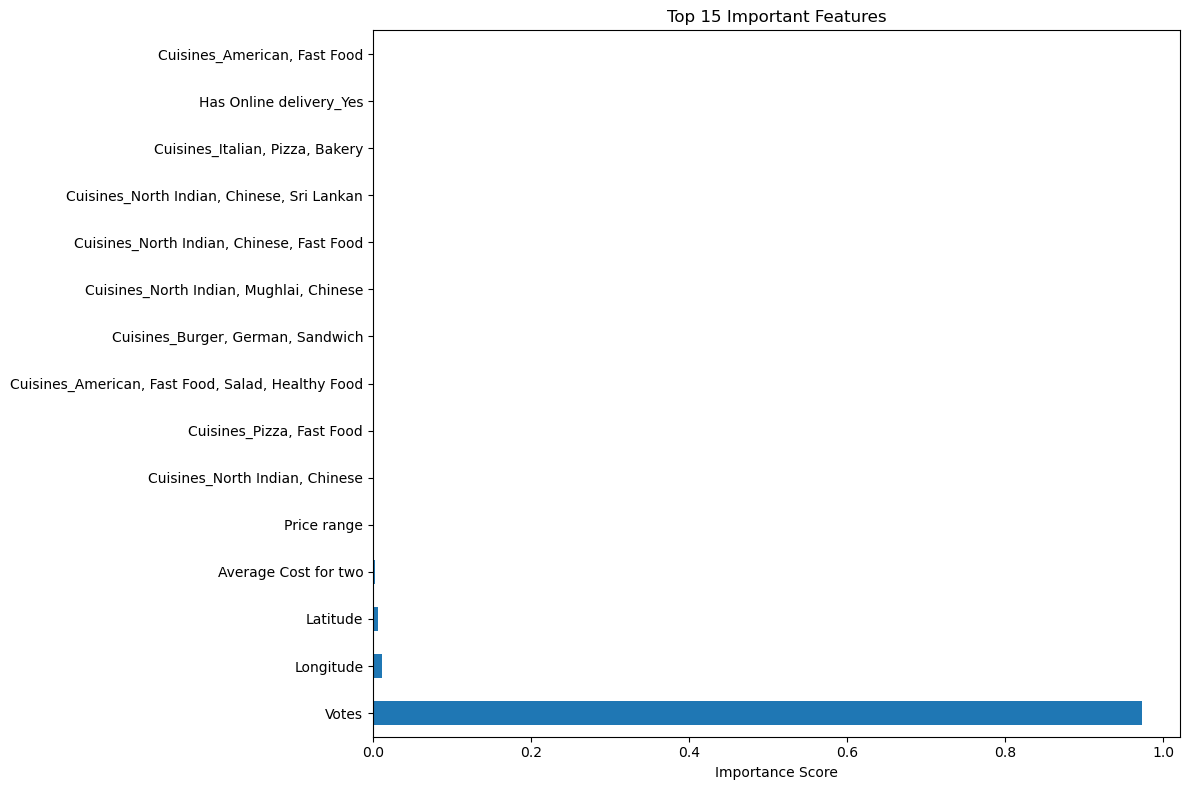

In [12]:
import matplotlib.pyplot as plt

if hasattr(model.named_steps['regressor'], 'feature_importances_'):
    numeric_features = features['numeric']
    ohe = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    categorical_features = ohe.get_feature_names_out(features['categorical'])
    all_features = numeric_features + list(categorical_features)
    importance = pd.Series(
        model.named_steps['regressor'].feature_importances_,
        index=all_features
    ).sort_values(ascending=False)
    
    plt.figure(figsize=(12, 8))
    importance.head(15).plot.barh()
    plt.title('Top 15 Important Features')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
else:
    print("\nWarning: Feature importance not available for this model type")

In [13]:
import joblib
from datetime import datetime

model_name = f"restaurant_rating_model_{datetime.now().strftime('%Y%m%d_%H%M')}.pkl"
joblib.dump(model, model_name)
print(f"\nModel saved as '{model_name}'")


Model saved as 'restaurant_rating_model_20250622_1249.pkl'


In [14]:
#My model is created and saved successfully

In [17]:
import joblib
import pandas as pd


In [25]:
model = joblib.load('restaurant_rating_predictor.pkl')

In [26]:
new_restaurant = {
    'Cuisines': ['Italian, Japanese'],
    'Has Table booking': ['Yes'],
    'City': ['Makati City'],
    'Longitude': [121.025255],
    'Latitude': [14.563443],
    'Average Cost for two': [1500],
    'Price range': [3],
    'Votes': [200]
}

In [28]:
new_data = pd.DataFrame(new_restaurant)

In [30]:
def predict_rating():
    model = joblib.load('restaurant_rating_predictor.pkl')
    num_cols = model.named_steps['preprocessor'].named_transformers_['num'].feature_names_in_
    cat_cols = model.named_steps['preprocessor'].named_transformers_['cat'].feature_names_in_
    required_cols = list(num_cols) + list(cat_cols)
    
    print(f"Please provide these details:\n{required_cols}\n")
    input_data = {}
    for col in required_cols:
        if col in num_cols:
            input_data[col] = [float(input(f"{col}: "))]
        else:
            input_data[col] = [input(f"{col}: ")]
    new_data = pd.DataFrame(input_data)[required_cols]
    try:
        rating = model.predict(new_data)[0]
        print(f"\nPredicted Rating: {rating:.2f}/5.0")
    except Exception as e:
        print(f"Prediction failed: {str(e)}")
predict_rating()

Please provide these details:
['Average_Cost', 'Votes', 'Cuisines', 'Has_Online_Delivery', 'Price_Range']



Average_Cost:  500
Votes:  5
Cuisines:  spanish
Has_Online_Delivery:  no
Price_Range:  500-1999



Predicted Rating: 4.26/5.0


In [130]:
# Upper is the testing of thus code and it runs ccurately as i expected 

In [ ]:
# My model is created and tested successfully 
#Thank you - Jagan Mohan Khuntia .